DIMENSIONALITY REDUCTION - PatrolIQ
✓ Loaded existing data files

Data shapes:
  Original: (5000, 10)
  Combined: (5000, 18)

✓ Output directory: outputs/dimensionality

PCA ANALYSIS

PCA Results (Top 3 Components):
  PC1: 97.89%
  PC2: 2.11%
  PC3: 0.00%
Cumulative: 100.00%


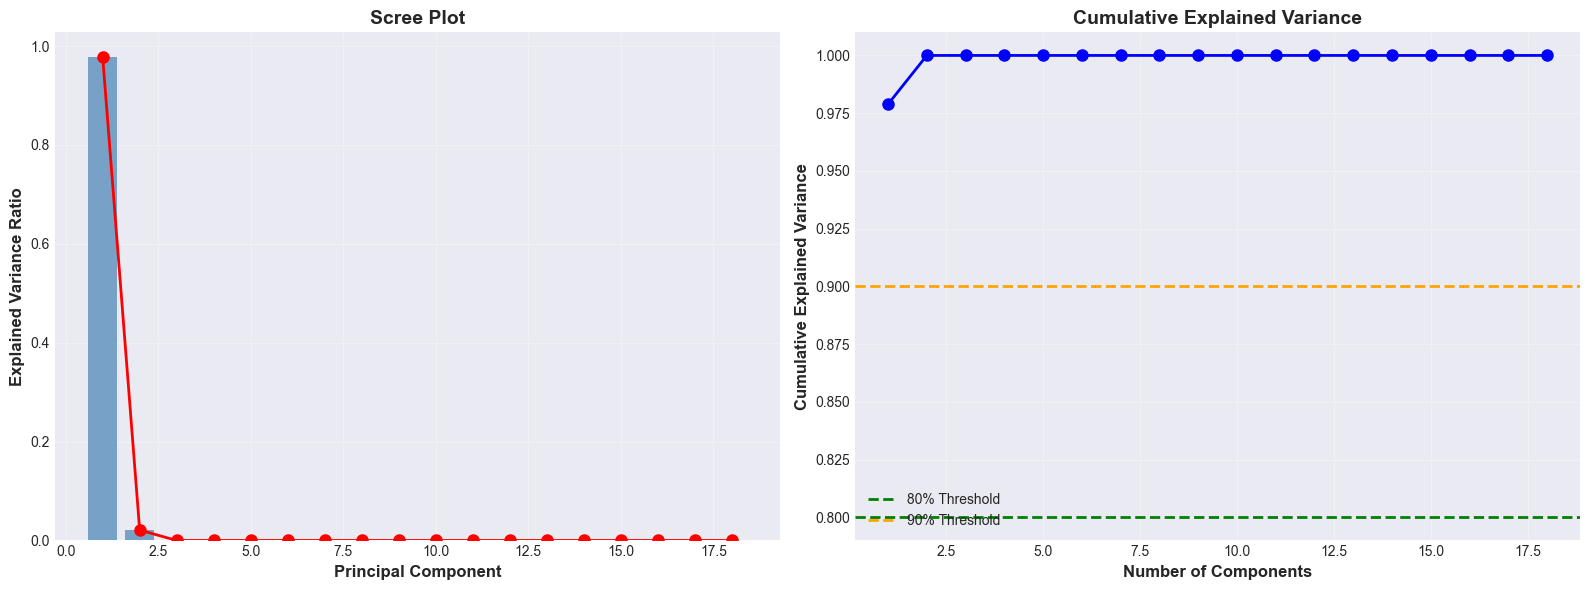


✓ Components for 80% variance: 1
  Dimensionality reduction: 94.4%

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features per Component:

PC1:
   1. Avg_Income                     +1.0000
   2. Population_Density             -0.0023
   3. Hour                           +0.0000
   4. Police_Stations                +0.0000
   5. Hour_Sin                       -0.0000
   6. Day_of_Week                    +0.0000
   7. Month                          +0.0000
   8. Is_Weekend                     +0.0000
   9. Crime_ASSAULT                  +0.0000
  10. Hour_Cos                       +0.0000

PC2:
   1. Population_Density             +1.0000
   2. Avg_Income                     +0.0023
   3. Hour                           +0.0000
   4. Month                          -0.0000
   5. Crime_Severity_Score           -0.0000
   6. Is_Weekend                     -0.0000
   7. Day_of_Week                    +0.0000
   8. Crime_ASSAULT                  +0.0000
   9. Police_Stations             

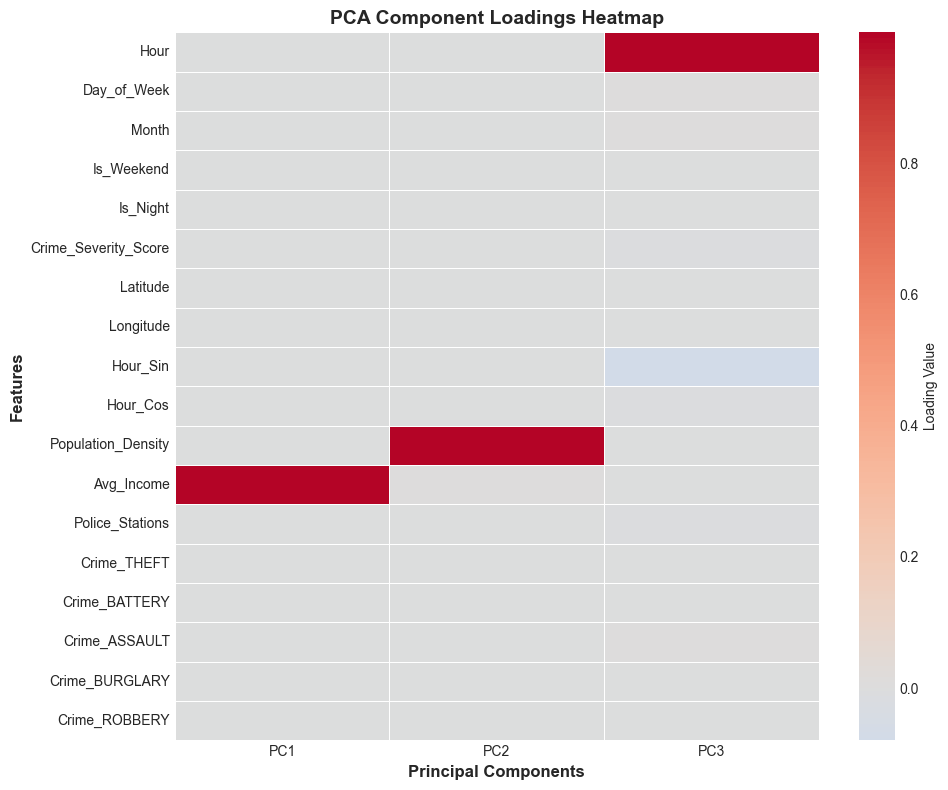


✓ Saved: pca_loadings.csv

PCA VISUALIZATIONS


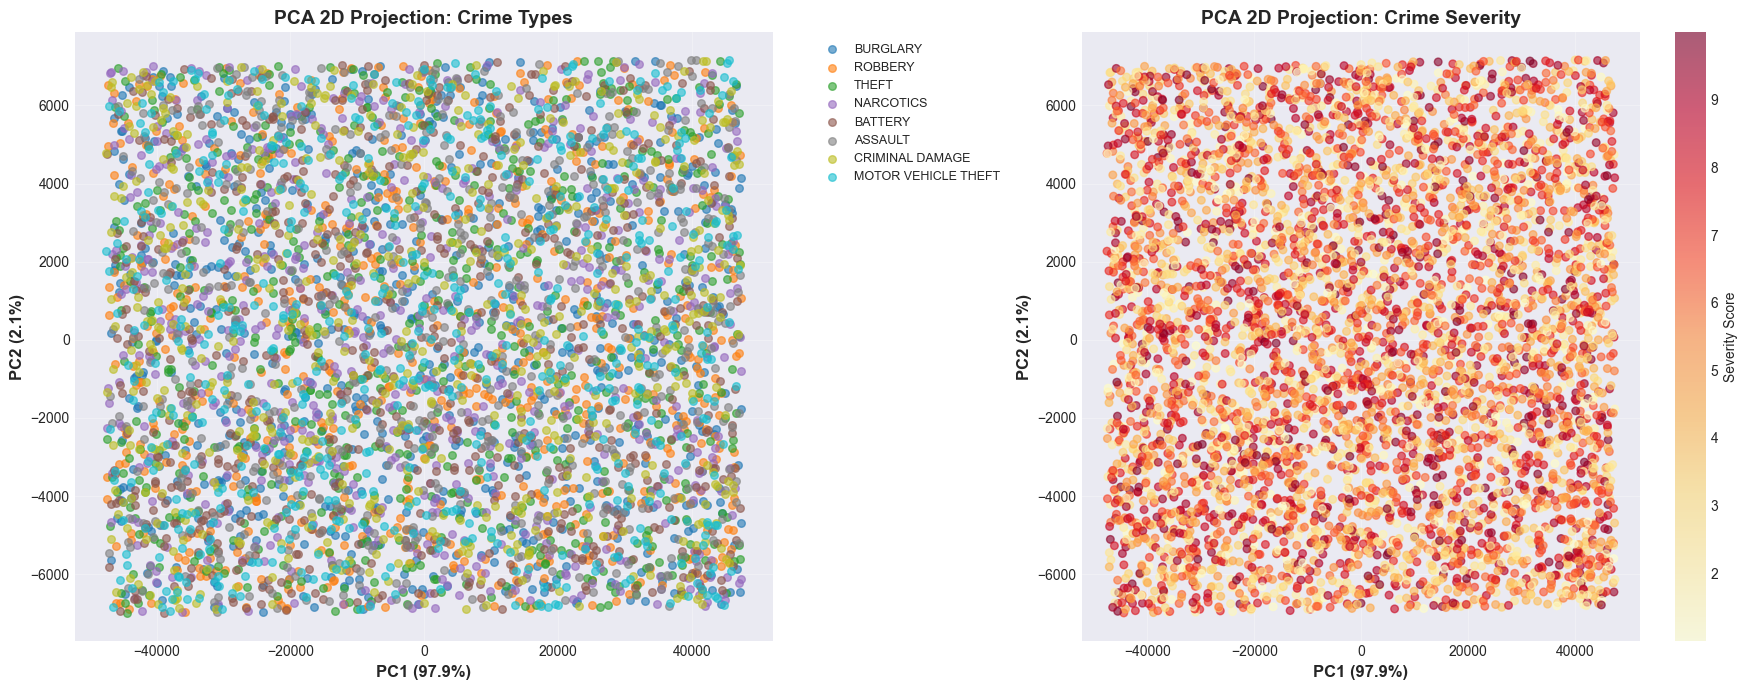

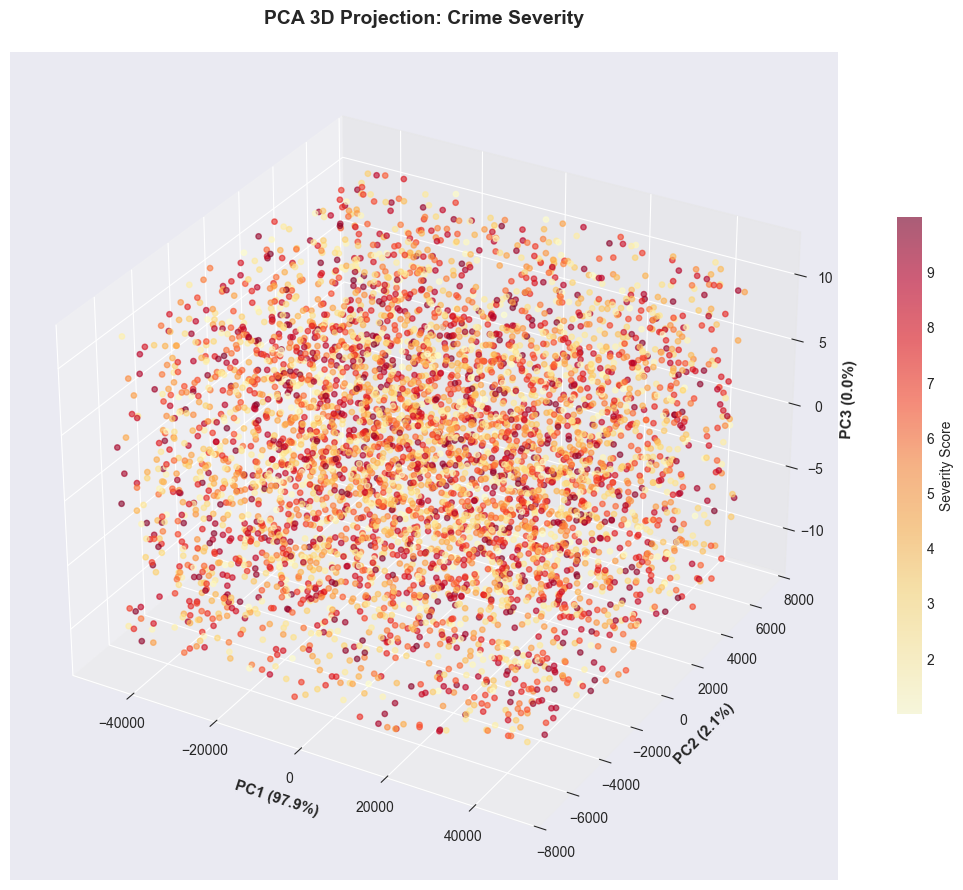

✓ PCA visualizations complete

t-SNE ANALYSIS
Using sample size: 1500 records
Preprocessing with PCA...
✓ Reduced to 18 dimensions
Fitting t-SNE (this may take 2-4 minutes)...
✓ t-SNE fitting complete


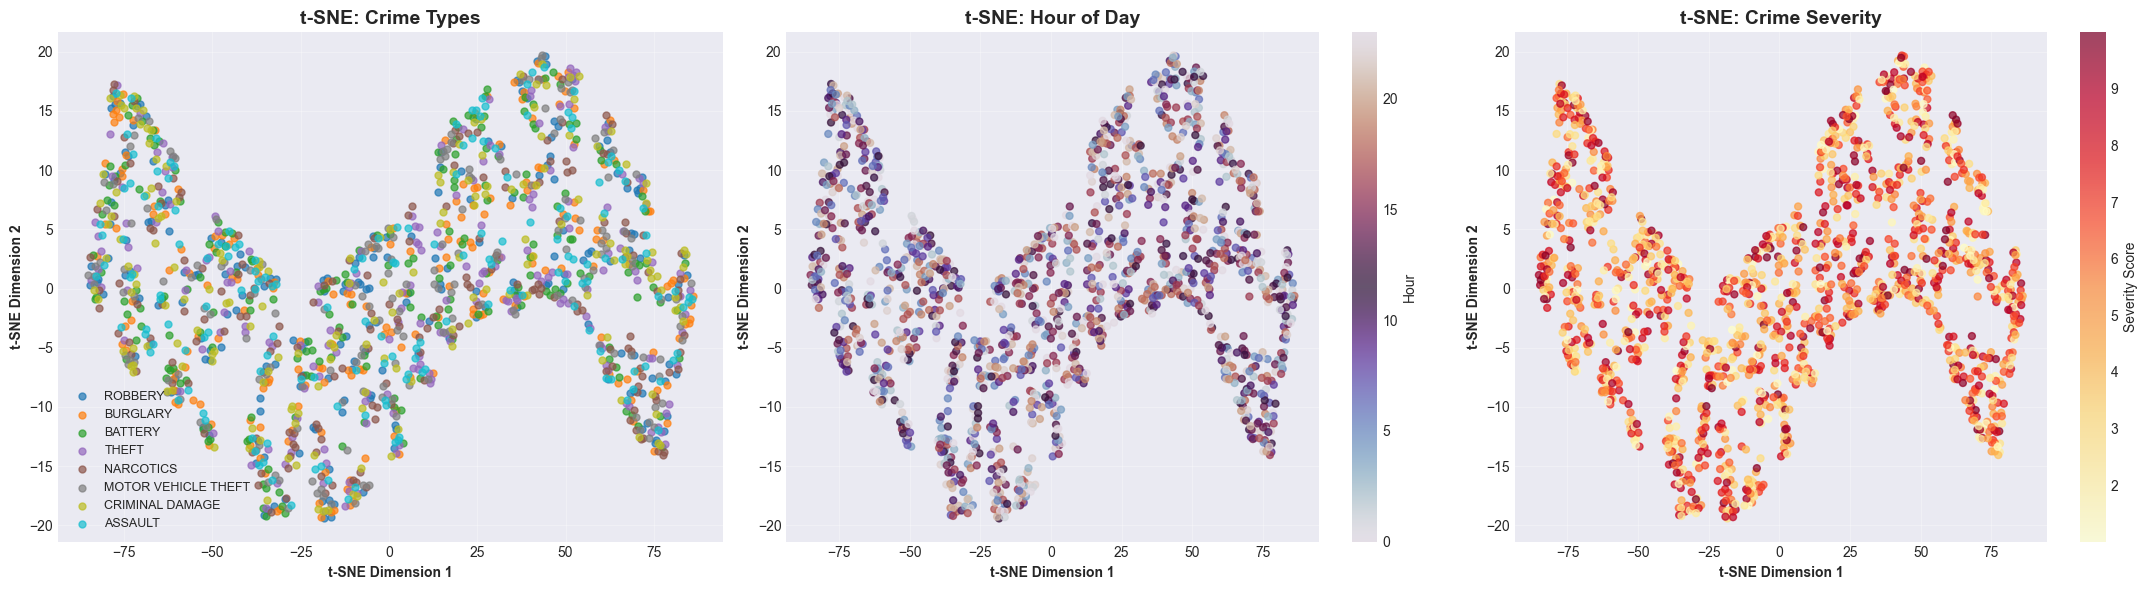

✓ t-SNE visualizations complete

SAVING RESULTS
✓ Saved: pca_results.csv
✓ Saved: tsne_results.csv
✓ Saved: variance_summary.csv

ANALYSIS COMPLETE!

📊 Dataset Summary:
  • Total records: 5,000
  • Original features: 18
  • PCA top 3 components: 100.0% variance
  • Components for 80% variance: 1
  • Dimensionality reduction: 94.4%

📁 Generated Files:
  1. outputs/dimensionality/pca_variance.png
  2. outputs/dimensionality/pca_loadings.png
  3. outputs/dimensionality/pca_2d.png
  4. outputs/dimensionality/pca_3d.png
  5. outputs/dimensionality/tsne.png
  6. outputs/dimensionality/pca_results.csv
  7. outputs/dimensionality/tsne_results.csv
  8. outputs/dimensionality/pca_loadings.csv
  9. outputs/dimensionality/variance_summary.csv

✅ All done! Review visualizations in: outputs/dimensionality


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
import gc

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("DIMENSIONALITY REDUCTION - PatrolIQ")
print("="*70)

def create_sample_data():
    """Create sample crime data with all features"""
    np.random.seed(42)
    n = 5000
    
    crime_types = ['THEFT', 'BATTERY', 'ASSAULT', 'BURGLARY', 'ROBBERY',
                   'NARCOTICS', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT']
    
    df_orig = pd.DataFrame({
        'ID': range(1, n + 1),
        'Primary_Type': np.random.choice(crime_types, n),
        'Hour': np.random.randint(0, 24, n),
        'Day_of_Week': np.random.randint(0, 7, n),
        'Month': np.random.randint(1, 13, n),
        'Crime_Severity_Score': np.random.uniform(1, 10, n),
        'Latitude': np.random.uniform(41.6, 42.0, n),
        'Longitude': np.random.uniform(-87.9, -87.5, n),
        'Is_Weekend': np.random.choice([0, 1], n),
        'Is_Night': np.random.choice([0, 1], n)
    })
    
    df_comb = pd.DataFrame({
        'Hour': df_orig['Hour'],
        'Day_of_Week': df_orig['Day_of_Week'],
        'Month': df_orig['Month'],
        'Is_Weekend': df_orig['Is_Weekend'],
        'Is_Night': df_orig['Is_Night'],
        'Crime_Severity_Score': df_orig['Crime_Severity_Score'],
        'Latitude': df_orig['Latitude'],
        'Longitude': df_orig['Longitude'],
        'Hour_Sin': np.sin(2 * np.pi * df_orig['Hour'] / 24),
        'Hour_Cos': np.cos(2 * np.pi * df_orig['Hour'] / 24),
        'Population_Density': np.random.uniform(1000, 15000, n),
        'Avg_Income': np.random.uniform(25000, 120000, n),
        'Police_Stations': np.random.randint(1, 8, n)
    })
    
    # Add crime type dummy variables
    for crime in crime_types[:5]:
        df_comb[f'Crime_{crime}'] = (df_orig['Primary_Type'] == crime).astype(int)
    
    df_orig.to_csv('engineered_crime_data.csv', index=False)
    df_comb.to_csv('features_combined.csv', index=False)
    
    return df_orig, df_comb

# Load or create data
try:
    df_original = pd.read_csv('engineered_crime_data.csv')
    df_combined = pd.read_csv('features_combined.csv')
    print("✓ Loaded existing data files")
except FileNotFoundError:
    print("⚠️  Files not found. Creating sample data...")
    df_original, df_combined = create_sample_data()
    print("✓ Sample data created")

print(f"\nData shapes:")
print(f"  Original: {df_original.shape}")
print(f"  Combined: {df_combined.shape}")

# Prepare features
X = df_combined.values
X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

output_dir = 'outputs/dimensionality'
os.makedirs(output_dir, exist_ok=True)
print(f"\n✓ Output directory: {output_dir}")

# CELL 2: PCA ANALYSIS

print("\n" + "="*70)
print("PCA ANALYSIS")
print("="*70)

# Fit PCA with 3 components for visualization
pca = PCA(n_components=3, random_state=42)
pca_results = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nPCA Results (Top 3 Components):")
for i, var in enumerate(explained_variance):
    print(f"  PC{i+1}: {var*100:.2f}%")
print(f"Cumulative: {cumulative_variance[-1]*100:.2f}%")

# Fit full PCA for complete variance analysis
pca_full = PCA(random_state=42)
pca_full.fit(X)
explained_var_full = pca_full.explained_variance_ratio_
cumulative_var_full = np.cumsum(explained_var_full)

# Create variance plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

n_show = min(20, len(explained_var_full))

# Scree plot
axes[0].bar(range(1, n_show + 1), explained_var_full[:n_show], 
           color='steelblue', alpha=0.7)
axes[0].plot(range(1, n_show + 1), explained_var_full[:n_show], 
            'ro-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontweight='bold', fontsize=12)
axes[0].set_title('Scree Plot', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Cumulative variance plot
axes[1].plot(range(1, n_show + 1), cumulative_var_full[:n_show], 
            'bo-', linewidth=2, markersize=8)
axes[1].axhline(0.8, color='g', linestyle='--', linewidth=2, label='80% Threshold')
axes[1].axhline(0.9, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
axes[1].set_xlabel('Number of Components', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontweight='bold', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate components needed for 80% variance
n_80 = np.argmax(cumulative_var_full >= 0.8) + 1 if np.any(cumulative_var_full >= 0.8) else len(cumulative_var_full)
print(f"\n✓ Components for 80% variance: {n_80}")
print(f"  Dimensionality reduction: {(1 - n_80/X.shape[1])*100:.1f}%")


# CELL 3: PCA FEATURE IMPORTANCE

print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(3)],
    index=df_combined.columns
)

print("\nTop 10 Most Important Features per Component:")
for col in loadings_df.columns:
    print(f"\n{col}:")
    top_features = loadings_df[col].abs().nlargest(10)
    for i, (feat, val) in enumerate(top_features.items(), 1):
        sign = '+' if loadings_df.loc[feat, col] > 0 else '-'
        print(f"  {i:2d}. {feat:30s} {sign}{val:.4f}")

# Heatmap of loadings
plt.figure(figsize=(10, max(8, len(df_combined.columns)//4)))
sns.heatmap(loadings_df, cmap='coolwarm', center=0, linewidths=0.5, 
            cbar_kws={'label': 'Loading Value'}, annot=False)
plt.title('PCA Component Loadings Heatmap', fontweight='bold', fontsize=14)
plt.xlabel('Principal Components', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.savefig(f'{output_dir}/pca_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

loadings_df.to_csv(f'{output_dir}/pca_loadings.csv')
print(f"\n✓ Saved: pca_loadings.csv")


# CELL 4: PCA VISUALIZATIONS

print("\n" + "="*70)
print("PCA VISUALIZATIONS")
print("="*70)

# Sample data for visualization
sample_size = min(10000, len(pca_results))
idx = np.random.choice(len(pca_results), sample_size, replace=False)
pca_sample = pca_results[idx]
df_sample = df_original.iloc[idx].reset_index(drop=True)

# 2D Scatter Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot by crime type
if 'Primary_Type' in df_sample.columns:
    top_crimes = df_sample['Primary_Type'].value_counts().head(8).index
    colors = plt.cm.tab10(np.linspace(0, 1, 8))
    
    for i, crime in enumerate(top_crimes):
        mask = df_sample['Primary_Type'] == crime
        axes[0].scatter(pca_sample[mask, 0], pca_sample[mask, 1],
                       alpha=0.6, s=30, label=crime, c=[colors[i]])
    
    axes[0].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', 
                      fontweight='bold', fontsize=12)
    axes[0].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', 
                      fontweight='bold', fontsize=12)
    axes[0].set_title('PCA 2D Projection: Crime Types', 
                     fontweight='bold', fontsize=14)
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    axes[0].grid(True, alpha=0.3)

# Plot by severity
if 'Crime_Severity_Score' in df_sample.columns:
    sc = axes[1].scatter(pca_sample[:, 0], pca_sample[:, 1],
                        c=df_sample['Crime_Severity_Score'],
                        cmap='YlOrRd', alpha=0.6, s=30)
    axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', 
                      fontweight='bold', fontsize=12)
    axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', 
                      fontweight='bold', fontsize=12)
    axes[1].set_title('PCA 2D Projection: Crime Severity', 
                     fontweight='bold', fontsize=14)
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(sc, ax=axes[1], label='Severity Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/pca_2d.png', dpi=300, bbox_inches='tight')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

if 'Crime_Severity_Score' in df_sample.columns:
    sc = ax.scatter(pca_sample[:, 0], pca_sample[:, 1], pca_sample[:, 2],
                   c=df_sample['Crime_Severity_Score'], cmap='YlOrRd',
                   alpha=0.6, s=15)
    ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', 
                 fontweight='bold', fontsize=11)
    ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', 
                 fontweight='bold', fontsize=11)
    ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}%)', 
                 fontweight='bold', fontsize=11)
    ax.set_title('PCA 3D Projection: Crime Severity', 
                fontweight='bold', fontsize=14, pad=20)
    plt.colorbar(sc, ax=ax, shrink=0.6, label='Severity Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/pca_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ PCA visualizations complete")
gc.collect()

# CELL 5: t-SNE ANALYSIS

print("\n" + "="*70)
print("t-SNE ANALYSIS")
print("="*70)

# Sample for t-SNE (computational efficiency)
tsne_size = min(1500, len(X))
print(f"Using sample size: {tsne_size} records")

tsne_idx = np.random.choice(len(X), tsne_size, replace=False)
X_tsne = X[tsne_idx]
df_tsne = df_original.iloc[tsne_idx].reset_index(drop=True)

# PCA preprocessing for t-SNE
print("Preprocessing with PCA...")
n_components_pca = min(30, X_tsne.shape[1])
pca_pre = PCA(n_components=n_components_pca, random_state=42)
X_reduced = pca_pre.fit_transform(X_tsne)
print(f"✓ Reduced to {X_reduced.shape[1]} dimensions")

del X_tsne
gc.collect()

# Fit t-SNE
print("Fitting t-SNE (this may take 2-4 minutes)...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42,
            max_iter=1000, learning_rate=200.0, verbose=0)
tsne_results = tsne.fit_transform(X_reduced)

del X_reduced
gc.collect()

print("✓ t-SNE fitting complete")

# Visualize t-SNE results
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# By crime type
if 'Primary_Type' in df_tsne.columns:
    top_crimes = df_tsne['Primary_Type'].value_counts().head(8).index
    colors = plt.cm.tab10(np.linspace(0, 1, 8))
    
    for i, crime in enumerate(top_crimes):
        mask = df_tsne['Primary_Type'] == crime
        axes[0].scatter(tsne_results[mask, 0], tsne_results[mask, 1],
                       alpha=0.7, s=25, label=crime, c=[colors[i]])
    axes[0].set_title('t-SNE: Crime Types', fontweight='bold', fontsize=14)
    axes[0].set_xlabel('t-SNE Dimension 1', fontweight='bold')
    axes[0].set_ylabel('t-SNE Dimension 2', fontweight='bold')
    axes[0].legend(fontsize=9)
    axes[0].grid(True, alpha=0.3)

# By hour
if 'Hour' in df_tsne.columns:
    sc1 = axes[1].scatter(tsne_results[:, 0], tsne_results[:, 1],
                         c=df_tsne['Hour'], cmap='twilight', alpha=0.7, s=25)
    axes[1].set_title('t-SNE: Hour of Day', fontweight='bold', fontsize=14)
    axes[1].set_xlabel('t-SNE Dimension 1', fontweight='bold')
    axes[1].set_ylabel('t-SNE Dimension 2', fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(sc1, ax=axes[1], label='Hour')

# By severity
if 'Crime_Severity_Score' in df_tsne.columns:
    sc2 = axes[2].scatter(tsne_results[:, 0], tsne_results[:, 1],
                         c=df_tsne['Crime_Severity_Score'], cmap='YlOrRd',
                         alpha=0.7, s=25)
    axes[2].set_title('t-SNE: Crime Severity', fontweight='bold', fontsize=14)
    axes[2].set_xlabel('t-SNE Dimension 1', fontweight='bold')
    axes[2].set_ylabel('t-SNE Dimension 2', fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    plt.colorbar(sc2, ax=axes[2], label='Severity Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/tsne.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ t-SNE visualizations complete")


# CELL 6: SAVE RESULTS

print("\n" + "="*70)
print("SAVING RESULTS")
print("="*70)

# Save PCA transformed data
pd.DataFrame(pca_results, columns=['PC1', 'PC2', 'PC3']).to_csv(
    f'{output_dir}/pca_results.csv', index=False)
print("✓ Saved: pca_results.csv")

# Save t-SNE transformed data
pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2']).to_csv(
    f'{output_dir}/tsne_results.csv', index=False)
print("✓ Saved: tsne_results.csv")

# Save variance summary
variance_summary = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_var_full))],
    'Variance_Explained': explained_var_full,
    'Cumulative_Variance': cumulative_var_full
})
variance_summary.to_csv(f'{output_dir}/variance_summary.csv', index=False)
print("✓ Saved: variance_summary.csv")


# FINAL SUMMARY

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

print(f"\n📊 Dataset Summary:")
print(f"  • Total records: {len(X):,}")
print(f"  • Original features: {X.shape[1]}")
print(f"  • PCA top 3 components: {cumulative_variance[-1]*100:.1f}% variance")
print(f"  • Components for 80% variance: {n_80}")
print(f"  • Dimensionality reduction: {(1-n_80/X.shape[1])*100:.1f}%")

print(f"\n📁 Generated Files:")
files = [
    "pca_variance.png",
    "pca_loadings.png", 
    "pca_2d.png",
    "pca_3d.png",
    "tsne.png",
    "pca_results.csv",
    "tsne_results.csv",
    "pca_loadings.csv",
    "variance_summary.csv"
]
for i, f in enumerate(files, 1):
    print(f"  {i}. {output_dir}/{f}")

print(f"\n✅ All done! Review visualizations in: {output_dir}")
print("="*70)